In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [13]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081))
])

In [14]:
train_dataset = datasets.MNIST(
    root='data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(
    root='data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)


In [15]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=0.3081)
           )

In [16]:
model = nn.Sequential(
    nn.Flatten(),             # 28x28 → 784
    nn.Linear(784, 128),      # warstwa ukryta
    nn.ReLU(),                # funkcja aktywacji
    nn.Linear(128, 10)        # warstwa wyjściowa – 10 klas
)


In [17]:
loss_fn = nn.CrossEntropyLoss()


In [18]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


In [19]:
def train(model, loader, loss_fn, optimizer, epoch):
    model.train()  #tryb treningu
    total_loss = 0

    for batch_idx, (data, target) in enumerate(loader):
        optimizer.zero_grad()             # zerujemy gradienty
        output = model(data)              # forward pass
        loss = loss_fn(output, target)    # obliczamy stratę
        loss.backward()                   # backpropagation
        optimizer.step()                  # aktualizacja wag

        total_loss += loss.item()
        if batch_idx % 100 == 0:
            print(f"Epoch {epoch} | Batch {batch_idx} | Loss: {loss.item():.4f}")

    avg_loss = total_loss / len(loader)
    print(f">>> Epoch {epoch} | Avg Loss: {avg_loss:.4f}")


In [20]:
def test(model, loader, loss_fn):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():  # wyłączamy gradienty – oszczędność zasobów
        for data, target in loader:
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1)  # indeks największej wartości
            correct += (pred == target).sum().item()

    test_loss /= len(loader)
    accuracy = correct / len(loader.dataset)
    print(f"Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}")


In [21]:
epochs = 5
for epoch in range(1, epochs + 1):
    train(model, train_loader, loss_fn, optimizer, epoch)
    test(model, test_loader, loss_fn)


Epoch 1 | Batch 0 | Loss: 2.3361
Epoch 1 | Batch 100 | Loss: 0.2931
Epoch 1 | Batch 200 | Loss: 0.2821
Epoch 1 | Batch 300 | Loss: 0.1966
Epoch 1 | Batch 400 | Loss: 0.1681
Epoch 1 | Batch 500 | Loss: 0.1596
Epoch 1 | Batch 600 | Loss: 0.2558
Epoch 1 | Batch 700 | Loss: 0.1712
Epoch 1 | Batch 800 | Loss: 0.1784
Epoch 1 | Batch 900 | Loss: 0.1632
>>> Epoch 1 | Avg Loss: 0.2747
Test Loss: 0.1446, Accuracy: 0.9556
Epoch 2 | Batch 0 | Loss: 0.1090
Epoch 2 | Batch 100 | Loss: 0.1516
Epoch 2 | Batch 200 | Loss: 0.1404
Epoch 2 | Batch 300 | Loss: 0.0551
Epoch 2 | Batch 400 | Loss: 0.0303
Epoch 2 | Batch 500 | Loss: 0.0679
Epoch 2 | Batch 600 | Loss: 0.0631
Epoch 2 | Batch 700 | Loss: 0.0681
Epoch 2 | Batch 800 | Loss: 0.0793
Epoch 2 | Batch 900 | Loss: 0.0279
>>> Epoch 2 | Avg Loss: 0.1128
Test Loss: 0.1063, Accuracy: 0.9678
Epoch 3 | Batch 0 | Loss: 0.1419
Epoch 3 | Batch 100 | Loss: 0.0699
Epoch 3 | Batch 200 | Loss: 0.0483
Epoch 3 | Batch 300 | Loss: 0.0774
Epoch 3 | Batch 400 | Loss: 0.14

### 'handmade' gradient

In [25]:
x = torch.tensor(2.0, requires_grad=True)
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# prosta funkcja: y = w * x + b
y = w * x + b

# loss: np. różnica względem celu y_true = 10
loss = (y - 10)**2

# oblicz gradient
loss.backward()

# pokaż gradienty
print(f"Gradient w: {w.grad}")  # ∂loss/∂w
print(f"Gradient b: {b.grad}")  # ∂loss/∂b
print(f"Gradient x: {x.grad}")  # ∂loss/∂x

Gradient w: -12.0
Gradient b: -6.0
Gradient x: -18.0


### gradient descent viz

In [32]:
# Ustawienie początkowej wartości parametru
w = torch.tensor(0.0, requires_grad=True)  # start z punktu 0

# Lista do śledzenia postępów
w_history = []
loss_history = []

# Optymalizator
optimizer = torch.optim.SGD([w], lr=0.15)

# Funkcja kosztu: (w - 3)^2
def loss_fn(w):
    return (w - 3) ** 2

# Trening – gradient descent
for step in range(30):
    loss = loss_fn(w)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    w_history.append(w.item())
    loss_history.append(loss.item())

    print(f"Step {step+1:02d} | w = {w.item():.4f} | Loss = {loss.item():.4f}")

Step 01 | w = 0.9000 | Loss = 9.0000
Step 02 | w = 1.5300 | Loss = 4.4100
Step 03 | w = 1.9710 | Loss = 2.1609
Step 04 | w = 2.2797 | Loss = 1.0588
Step 05 | w = 2.4958 | Loss = 0.5188
Step 06 | w = 2.6471 | Loss = 0.2542
Step 07 | w = 2.7529 | Loss = 0.1246
Step 08 | w = 2.8271 | Loss = 0.0610
Step 09 | w = 2.8789 | Loss = 0.0299
Step 10 | w = 2.9153 | Loss = 0.0147
Step 11 | w = 2.9407 | Loss = 0.0072
Step 12 | w = 2.9585 | Loss = 0.0035
Step 13 | w = 2.9709 | Loss = 0.0017
Step 14 | w = 2.9797 | Loss = 0.0008
Step 15 | w = 2.9858 | Loss = 0.0004
Step 16 | w = 2.9900 | Loss = 0.0002
Step 17 | w = 2.9930 | Loss = 0.0001
Step 18 | w = 2.9951 | Loss = 0.0000
Step 19 | w = 2.9966 | Loss = 0.0000
Step 20 | w = 2.9976 | Loss = 0.0000
Step 21 | w = 2.9983 | Loss = 0.0000
Step 22 | w = 2.9988 | Loss = 0.0000
Step 23 | w = 2.9992 | Loss = 0.0000
Step 24 | w = 2.9994 | Loss = 0.0000
Step 25 | w = 2.9996 | Loss = 0.0000
Step 26 | w = 2.9997 | Loss = 0.0000
Step 27 | w = 2.9998 | Loss = 0.0000
S

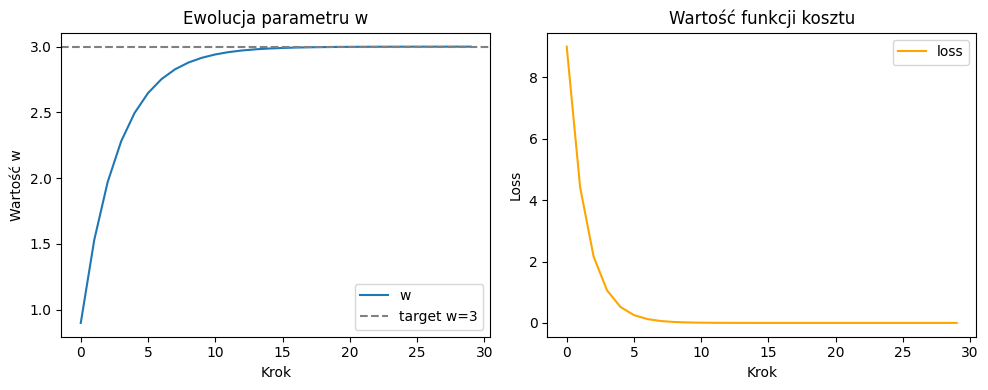

In [33]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(w_history, label="w")
plt.axhline(3, color='gray', linestyle='--', label="target w=3")
plt.title("Ewolucja parametru w")
plt.xlabel("Krok")
plt.ylabel("Wartość w")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_history, label="loss", color="orange")
plt.title("Wartość funkcji kosztu")
plt.xlabel("Krok")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
